In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

The proof is adopted from the Youtube lecture [Bandit Algorithm - 1](https://www.youtube.com/watch?v=xN11-epRuSU&list=PLf6zO2kXw8HqVxnPXF7GF_otdhJg_vIl-) by Tor Lattimore.

Let 

* $a$ denote an arm
* $\mathcal{A}$ denote the set of all arms
* $n_a$ denote the number of pulling for arm $a$
* $m = \sum_{a \in \mathcal{A}} n_a$ denote the total number of arm pulling
* $\hat{\mu}_a$: the estimated mean reward for arm $a$ after pulling it $n_a$ times
* $\mu_a$: the reward expectation for arm $a$
* $\mu^* = \arg \max_{a \in \mathcal{A}}$: the reward expectation of the best arm
* $\Delta_a = \mu^* - \mu_a$: the suboptimality gap, i.e. the gap in mean between the best arm and arm $a$
* $R_n$: regret after pulling $n$ times.

The goal of the proof is to bound $R_n$, and it follows these steps at high-level:

1. Bound $|\hat{\mu}_a - \mu_a|$ with concentration analys
2. Regret decomposition, which writes $R_n$ in terms of $\Delta_a$ and $n_a$ across $\mathcal{A}$.
3. Bound $\Delta_a$ using the results from conentration analysis and following UCB.
4. Bound regret using bound of $\Delta_a$

The dependency among the steps is 

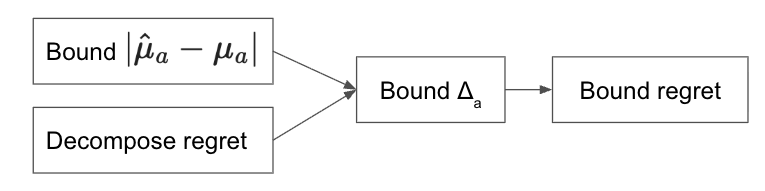

INTEND TO REDO THE DERIVATION WITH MY OWN NOTATIONS AS LISTED ABOVE

The proof of the bound is adopted from the Youtube lecture [Bandit Algorithm - 1](https://www.youtube.com/watch?v=xN11-epRuSU&list=PLf6zO2kXw8HqVxnPXF7GF_otdhJg_vIl-) by Tor Lattimore. It goes in three steps:

* Concentration analysis for Gaussian r.v. with known variance of 1, which bounds the mean of each arm.
* Decomposition of regret into a product of suboptimality gap $\Delta_a$ and number of plays for each action $T_a(n)$.
* Bound $T_a(t)$ as a function $\Delta_a$ using the UCB trick. Setting $\delta=\frac{1}{n^2}$. Then, consider actions separately for $\Delta_a$ above or below a cutoff $\Delta$, setting $\Delta=\sqrt{\frac{k \log n}{n}}$, we obtain $R_n = O(\sqrt{nk\log n})$.

# Concentration analysis for mean of $\mathcal{N}(\mu, 1)$ r.v.s

The output of concentration analysis is in the form of 

\begin{align*}
\mathbb{P}(\hat{\mu} \ge \mu + \epsilon(\delta)) &\le \delta \\
\mathbb{P}(\hat{\mu} \le \mu - \epsilon(\delta)) &\le \delta \\
\end{align*}

which leads to

\begin{align*}
\mathbb{P}(|\hat{\mu} - \mu| \le \epsilon(\delta)) \ge 1 - 2 \delta
\end{align*}

where

* $\hat{\mu}$ is the esitmated mean of a random variable.
* $\mu$ is the expectation of the random vaiable.
* $\delta \in (0, 1)$, and is called the confidence level.
* $\epsilon(\delta) > 0$ is a cutoff, $[\mu - \epsilon(\delta), \mu + \epsilon(\delta)]$ is called the confidence interval.

For a sequence of $T$ IID Gaussian random variables with mean $\mu$ and variance $1$, $X_1, \cdots, X_T$, let

$$\hat{\mu} = \frac{1}{T} \sum_{t=1}^T X_t$$

We can show

\begin{align}
\mathbb{P}(\hat{\mu} \ge \mu + \epsilon) 
&\le \exp \left( - \frac{\epsilon^2T}{2} \right) \\
\end{align}

for a positive $\epsilon$. See Appendix for a proof.

Let 

\begin{align*}
\delta &= \exp \left(- \frac{\epsilon^2 T}{2} \right) \\
\epsilon &= \sqrt{\frac{2 \log (1 / \delta)}{T}}
\end{align*}

Then, we have

\begin{align*}
\mathbb{P} \left(\hat{\mu} \ge \mu + \sqrt{\frac{2 \log(1 / \delta)}{T}} \right) 
&\le \delta \\
\mathbb{P} \left(\hat{\mu} \le \mu - \sqrt{\frac{2 \log(1 / \delta)}{T}} \right) 
&\le \delta \\
\mathbb{P}\left(|\hat{\mu} - \mu| \le \sqrt{\frac{2 \log(1 / \delta)}{T}} \right) 
&\ge 1 - 2 \delta \\
\end{align*}

# Regret decomposition

By definition, the regret after round $n$ is $R_n$ is 

\begin{align*}
R_n = n \mu^* - \mathbb{E}\left[ \sum_{t=1}^n X_t \right ]
\end{align*}

Note,

* $n$ is the number of rounds of all actions so far. Note, in contrast, we use $T$ for the number of rounds corresponding to a particular arm $a$, i.e. $n = \sum_a T_a$.
* $\mu^*$ is the mean reward of the best action.
* $X_t$ is the realized reward at round $t$.

It can be rearanged to obtain

\begin{align}
R_n 
&= n \mu^* - \mathbb{E}\left[ \sum_{t=1}^n X_t \right ] \\
&= n \mu^* - \mathbb{E}\left[ \sum_{t=1}^n \sum_{a \in \mathcal{A}} \mathbb{1}(A_t = a) X_{a, t} \right ] \\
&= n \mu^* - \mathbb{E}\left[ \sum_{t=1}^n \sum_{a \in \mathcal{A}} \mathbb{1}(A_t = a) \mu_a \right ] \\
&= \mathbb{E} \left[ \sum_{t=1}^n \sum_{a \in \mathcal{A}} \mathbb{1}(A_t = a)  ( \mu^* - \mu_a ) \right ] \\
&= \sum_{a \in \mathcal{A} } ( \mu^* - \mu_a) \mathbb{E} \left[  \sum_{t=1}^n  \mathbb{1}(A_t = a)  \right ] \\
&= \sum_{a \in \mathcal{A} } \Delta_a \mathbb{E}[T_a(n)]
\end{align}

Note,

* 1st equality is the definition of regret after $n$ rounds.
* $\mu^*$ is the mean reward of the best action.
* $X_t$ is the reward obtained at round $t$.
* $\mu_a$ is the mean reward of action $a$.
* $A_t$ is the action played at round $t$.
* $\mathcal{A}$ is the set of all actions.
* In the 4th equation, $\mu^* - \mu_a$ is a constant given action $a$.
* In the 6th equation:
  * $\Delta_{a} = \mu^* - \mu_a \ge 0$ is called the suboptimality gap for action $a$, i.e. the difference between the mean reward of the best action and that of action $a$.
  * $T_a(n) = \sum_{t=1}^n  \mathbb{1}(A_t = a)$ is the number of times out of $n$ rounds action $a$ is played.

# Regret analysis for upper confidence bound (UCB) algorithm

In UCB, we also select the action that has the largest upper bound.

We define good event $E$ as when the inequality from concentration analysis holds $|\hat{\mu} - \mu| \le \sqrt{\frac{2 \log(1 / \delta)}{T}}$ for all actions in all rounds.

Let's denote 

* $\hat{\mu}_a(t)$ as the mean estimation for action $a$ after $t$ rounds.
* $T_a(t)$ as the number of times action $a$ is played after $t$ rounds.

Under the good event, we have

\begin{align}
\mu_a + \sqrt{\frac{2 \log(1/\delta)}{T_a(t)}} 
&\ge \hat{\mu}_a(t) \\
\mu_a + 2 \sqrt{\frac{2 \log(1/\delta)}{T_a(t)}} 
&\ge \hat{\mu}_a(t) + \sqrt{\frac{2 \log(1/\delta)}{T_a(t)}} \\
&\ge \hat{\mu}_{a^*}(t) + \sqrt{\frac{2 \log(1/\delta)}{T_{a^*}(t)}} \\
&\ge \mu_{a^*} \\
\mu_a^* - \mu_a = \Delta_a
&\le 2 \sqrt{\frac{2 \log(1/\delta)}{T_a(t)}} 
\end{align}

Equality 2-4 are so-call the UCB (upper confidence bound) trick.

* the 2nd inequality just adds $\sqrt{\frac{2 \log(1/\delta)}{T_a(t)}}$ to both sides of the 1st inequality
* the 3rd inequality holds because we're using the UCB to select the best action, so the UCB of action $a$ must be better than or equal to that of the best action after round $t$.

So we have a bound for the suboptimality gap $\Delta_a$ for $t - 1$ rounds. Rearranging 5th inequality, we get

\begin{align*}
T_a(t) &\le \frac{8 \log(1 / \delta)}{\Delta_a^2}
\end{align*}

To use the above inequality in the decomposed regret in order to bound the regret, we need to calculate $\mathbb{E}[T_a(n)]$ first. By definition,

\begin{align*}
\mathbb{E}[T_a(n)] 
&= \mathbb{E}[T_a(n) | E] \mathbb{P}(E) + \mathbb{E}[T_a(n) | E^c] \mathbb{P}[E^c]
\end{align*}

See appendix for a quick proof of $\mathbb{E}[Y] = \sum_i \mathbb{E}[Y|X_i] \mathbb{P}(x_i)$.

We have already had 

\begin{align}
\mathbb{E}[T_a(n) | E] 
&\le \frac{8 \log(1 / \delta)}{\Delta_a^2} \\
\mathbb{P}(E)
&\le 1 \\
\mathbb{E}[T_a(n)|E^c] 
&\le n
\end{align}

The 3rd inequality is because we can play any arm at most $n$ times.

So we only need to bound $\mathbb{P}(E^c)$ now. The concentration analysis shows that for any round $t$,

\begin{align*}
\mathbb{P}\left( \hat{\mu}_{a, t} \ge \mu_a + \sqrt{\frac{2 \log(1 / \delta)}{t}} \right) \le \delta
\end{align*}

Then for all $n$ rounds, using union bound and one-tape assupmtion (<span style="color:red">still needs to think more about this assumption</span>),

\begin{align*}
\mathbb{P}\left( \forall t \le n; \hat{\mu}_{a, t} \ge \mu_a + \sqrt{\frac{2 \log(1 / \delta)}{t}} \right) \le n\delta
\end{align*}

Similary, we can get

\begin{align*}
\mathbb{P}\left( \forall t \le n; \hat{\mu}_{a, t} \le \mu_a - \sqrt{\frac{2 \log(1 / \delta)}{t}} \right) \le n\delta
\end{align*}

so, 

\begin{align*}
\mathbb{P}(E^c) \le 2n\delta
\end{align*}

Therefore, we can bound $\mathbb{E}[T_a(n)]$ as 

 \begin{align*}
\mathbb{E}[T_a(n)] 
&\le \left( \frac{8 \log(1 / \delta)}{\Delta_a^2}  \right ) \cdot 1 + n \cdot 2 n \delta \\
&= \frac{8 \log(1 / \delta)}{\Delta_a^2} + 2n^2\delta  
\end{align*}

Plugging it into the decomposed regret, we have

\begin{align*}
R_n 
&= \sum_{a \in \mathcal{A
}} \Delta_a \mathbb{E}\left[ T_a(n) \right ] \\
&\le \sum_{a \in \mathcal{A}} \Delta_a \left( 2n^2 \delta + \frac{8 \log(1 / \delta)}{\Delta_a^2} \right )
\end{align*}

We can choose $\delta$ to minimize the RHS, choosing $\delta = \frac{1}{n^2}$ (Not the actual minimizer), 

\begin{align*}
R_n 
&\le \sum_{a \in \mathcal{A}} \Delta_a \left( 2 + \frac{16 \log(n)}{\Delta_a^2} \right ) \\
&\le \sum_{a \in \mathcal{A}} 2 \Delta_a + \frac{16 \log(n)}{\Delta_a}
\end{align*}

Note, **RHS can be quite big if $\Delta_a$ is very small for long horizon application**. Hence, we can consider $R_n$ for $\Delta_a$ that is below or above some cutoff $\Delta$, separately,

 \begin{align*}
R_n 
&= \sum_{a \in \mathcal{A}: \Delta_a \le \Delta} \Delta_a \mathbb{E}[T_a(n)] + \sum_{a \in \mathcal{A}: \Delta_a > \Delta} \Delta_a \mathbb{E}[T_a(n)] \\
&\le n\Delta + \sum_{a \in \mathcal{A}: \Delta_a > \Delta} 2 \Delta_a + \frac{16 \log(n)}{\Delta_a} \\
\end{align*}

Note,

* $\sum_{a \in \mathcal{A}: \Delta_a \le \Delta} \Delta_a \mathbb{E}[T_a(n)]  \le n\Delta$ because we can play the arms at most $n$ times and they have all have $\Delta_a \le \Delta$ by definition.

We can minimize RHS by choosing $\Delta = \sqrt\frac{{k \log n}}{n}$ (<span style="color:red">still needs to confirm how it's calculated</span> the derivation below isn't correct, see `Prove-regret-bounds-UCB-with-stochastic-Bernoulli-bandits.ipynb` for a more proper derivation), where $k$ is the number of arms,

 \begin{align*}
n\Delta
&= \sqrt{n k \log n} \\
\sum_{a \in \mathcal{A}: \Delta_a > \Delta} 2 \Delta_a
&\le 2k \sqrt{\frac{k \log n}{n}} \le 2 \sqrt{k \log n} \le 2 \sqrt{n \log n} \\
\sum_{a \in \mathcal{A}: \Delta_a > \Delta} \frac{16 \log(n)}{\Delta_a} 
&\le 16 \log n \sqrt{\frac{n}{k \log n}} =16 \sqrt{\frac{n \log n}{k}} \le 16 \sqrt{n \log n}
\end{align*}

Note, we assume $n \ge k$.

Therefore,

\begin{align*}
R_n &= O(\sqrt{n k \log n})
\end{align*}

# Appendix

### Concentration analysis for Gaussian r.v. with mean $\mu$ and variance $1$.

\begin{align}
\mathbb{P}(\hat{\mu} \ge \mu + \epsilon) 
&= \mathbb{P} \left(\frac{1}{T} \sum_{t=1}^T X_t \ge \mu + \epsilon \right) \\
&= \mathbb{P} \left(\sum_{t=1}^T (X_t - \mu) \ge T\epsilon \right) \\
&= \mathbb{P} \left(\lambda \sum_{t=1}^T (X_t - \mu) \ge \lambda T\epsilon \right) \\
&= \mathbb{P} \left(\exp \left( \lambda \sum_{t=1}^T (X_t - \mu) \right ) \ge \exp \left(\lambda T\epsilon \right ) \right )\\
&\le \frac{\mathbb{E} \left[\exp \left( \lambda \sum_{t=1}^T (X_t - \mu) \right ) \right]}{\exp \left( \lambda T\epsilon \right )} \\
&= \frac{ \mathbb{E} \left[\prod_{t=1}^T \exp \left( \lambda (X_t - \mu)\right ) \right]}{\exp \left( \lambda T\epsilon \right )} \\
&= \frac{ \prod_{t=1}^T \mathbb{E} \left[ \exp \left( \lambda (X_t - \mu)\right ) \right]}{\exp \left( \lambda T\epsilon\right )} \\
&= \frac{ \prod_{t=1}^T \exp \left( \frac{\lambda ^2}{2} \right )}{ \exp \left( \lambda T\epsilon\right )} \\
&= \exp \left( \frac{\lambda ^2 T}{2} - \lambda T\epsilon \right ) \\
\end{align}

Note,

* $\lambda$ is a positive variable we can choose freely.
* In 4th equality, we take the exponential so that the quantity becomes positive and Markov's inequality can be applied.
* the 5th inequality is a direct application of Markov's inequality: $\mathbb{E}[Z \ge t] = \frac{\mathbb{E}[Z]}{t}$ for non-negative random variable, $Z$
* the 6th equality holds because $\mathbb{E}\left[\prod X_i \right] = \prod \mathbb{E}\left[X_i\right]$ for independent random variables. A quick proof for two r.v.s with $f(x_1)$ and $f(x_2)$ being the probability density functions,

\begin{align*}
\mathbb{E}[X_1 \cdot X_2] 
&= \iint_{x_1, x_2} f(x_1 \cdot x_2) dx_1 dx_2 \\
&= \iint_{x_1, x_2} f(x_1) f(x_2) dx_1 dx_2 \\
&= \int_{x_1} f(x_1) dx_1 \int_{x_2} f(x_2) dx_2 \\
&= \mathbb{E}[X_1] \mathbb{E}[X_2]
\end{align*}

* the 7th equality is an application of the MGF for Standard Gaussian r.v. with $\mu = 0$ and $\sigma^2=1$, $M_x(\lambda) = \mathbb{E}[e^{\lambda X}] = e^{\lambda^2 / 2}$. A quick proof:

\begin{align*}
\mathbb{E}[e^{\lambda X}]
&= \int \exp(\lambda x) \frac{1}{\sqrt{2 \pi}} \exp\left(- \frac{1}{2}x^2 \right ) dx \\
&= \frac{1}{\sqrt{2 \pi}} \int \exp \left(\lambda x - \frac{1}{2}x^2 \right ) dx \\
&= \frac{1}{\sqrt{2 \pi}} \int \exp \left(- \frac{1}{2} \left(x^2 - 2\lambda x  \right ) \right ) dx \\
&= \frac{1}{\sqrt{2 \pi}} \int \exp \left(- \frac{1}{2} \left( x - \lambda)^2 - \lambda^2 \right ) \right ) dx \\
&= \exp \left(\frac{\lambda ^2}{2} \right ) \frac{1}{\sqrt{2 \pi}}  \int \exp \left(- \frac{1}{2} (x - \lambda)^2 \right ) dx \\
&= \exp \left(\frac{\lambda ^2}{2} \right )
\end{align*}

A derivation of MGF for the more general $\mathcal{N}(\mu, \sigma^2)$ is available [here](https://zyxue.github.io/2021/08/29/gaussian-distributions.html).

Given the RHS in 9th equality is just a quadratic function, and we can choose $\lambda$ freely,

\begin{align*}
\min_{\lambda} \exp \left( \frac{\lambda ^2 T}{2} - \lambda T\epsilon \right ) = \exp \left( - \frac{\epsilon^2T}{2} \right)
\end{align*}

So 

\begin{align*}
\mathbb{P}(\hat{\mu} \ge \mu + \epsilon) \le \exp \left( - \frac{\epsilon^2 T}{2} \right)
\end{align*}

Note, the bound for $\mathbb{P}(\hat{\mu} \le \mu - \epsilon)$ can be obtained by deriving $\mathbb{P}(- \hat{\mu} \ge - \mu + \epsilon) = \mathbb{P}( \mu - \hat{\mu} \ge + \epsilon) $ using the same logic, and it turns out the lower bound has the same form, i.e.

\begin{align*}
\mathbb{P}(\hat{\mu} \le \mu - \epsilon) \le \exp \left( - \frac{\epsilon^2 T}{2} \right)
\end{align*}

This is because $X_t - \mu$ and $\mu - X_t$ have the same distribution when $X_t$ is Gaussian with mean $\mu$, which means $\mu - \hat{\mu}$ and $\hat{\mu} - \mu$ also have the same distribution.

### Prove $\mathbb{E}[Y] = \sum_i \mathbb{E}[Y|X_i] \mathbb{P}(x_i)$

\begin{align*}
\mathbb{E}[Y] 
&= \int_y y f(y) dy \\
&= \int_y y \sum_i f(y|x_i) \mathbb{P}(x_i) dy \\
&= \sum_i \int_y p(y|x_i)dy \mathbb{P}(x_i) \\
&= \sum_i \mathbb{E}[Y|X_i] \mathbb{P}(x_i)
\end{align*}


Note, here we have $Y$ being continuous and $X$ being discrete. $f(y)$ is the PDF of $Y$ and $\mathbb{P}$ is the PMF of $X_i$.